In [423]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [424]:
###data 읽기
young = pd.read_csv('./youngpeoplesurvey/responses.csv')
young.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [425]:
###null값이 포함된 데이터
youngwhnull = young[young[['Weight','Height']].isnull().any(axis=1)]
len(youngwhnull.index)

30

In [426]:
youngwhnull.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
51,5.0,3.0,3.0,3.0,1.0,4.0,3.0,5.0,4.0,3.0,...,19.0,NaN,75.0,1.0,female,right handed,secondary school,no,city,block of flats
137,5.0,3.0,4.0,3.0,3.0,5.0,5.0,5.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,right handed,primary school,yes,village,house/bungalow
142,5.0,4.0,4.0,1.0,3.0,2.0,2.0,4.0,4.0,1.0,...,NaN,NaN,NaN,NaN,male,left handed,primary school,no,city,block of flats
164,5.0,4.0,4.0,2.0,1.0,3.0,2.0,4.0,NaN,1.0,...,20.0,188.0,NaN,1.0,male,right handed,secondary school,no,village,house/bungalow
209,5.0,2.0,4.0,3.0,3.0,4.0,3.0,2.0,5.0,4.0,...,21.0,NaN,NaN,1.0,male,right handed,secondary school,no,village,house/bungalow


In [427]:
###weight와 height의 null값을 제외한 데이터
youngwh = young[young[['Weight','Height']].notnull().all(axis=1)]
youngwh.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [428]:
len(youngwh.index)

980

In [429]:
###총데이터 : 1010 확인
len(young.index) == len(youngwh) + len(youngwhnull)

True

In [430]:
###bmi 항목 추가
youngbmi = youngwh.copy()
# youngbmi['bmi'] = youngbmi.transform(lambda x : x.Weight/((x.Height/100)**2))
youngbmi['bmi'] = youngbmi['Weight']/((youngbmi['Height']/100.0)**2)

youngbmi.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,bmi
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats,18.066167
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats,21.829952
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats,21.629649
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow,19.943213
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow,20.415225


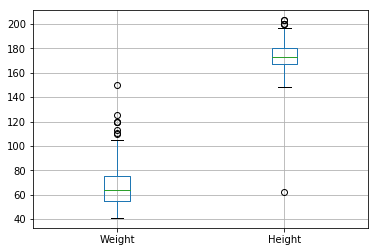

In [431]:
###outlier 제거를 위한 분포 확인.
youngbmi[['Weight','Height']].boxplot()#EU 데이터와 합치를 위해서 boxplot을 이용한 outiler는 고려하지 않음.

In [432]:
#EU data와 weight, height 범위를 맞추기 위함. outlier 데이터의 대략적 수를 파악
print(youngbmi.loc[youngbmi['Height']<142.42][['Height','Weight']])
print(len(youngbmi.loc[youngbmi['Height']<142.42][['Height','Weight']].index))
print(youngbmi.loc[youngbmi['Height']>195.58][['Height','Weight']])
print(len(youngbmi.loc[youngbmi['Height']>195.58][['Height','Weight']]))
print(youngbmi.loc[youngbmi['Weight']<44.45][['Height','Weight']])
print(len(youngbmi.loc[youngbmi['Weight']<44.45][['Height','Weight']].index))
print(youngbmi.loc[youngbmi['Weight']>145][['Height','Weight']])
print(len(youngbmi.loc[youngbmi['Weight']>145][['Height','Weight']]))

     Height  Weight
676    62.0    55.0
1
     Height  Weight
97    200.0    75.0
220   200.0    90.0
260   197.0    96.0
547   203.0    80.0
758   197.0   100.0
799   203.0    89.0
992   200.0   150.0
7
     Height  Weight
49    157.0    41.0
222   153.0    42.0
252   155.0    44.0
407   166.0    44.0
445   157.0    43.0
577   160.0    43.0
928   153.0    44.0
7
     Height  Weight
992   200.0   150.0
1


In [433]:
#outlier 제거(height, weight thresholding)
youngbmit = youngbmi.loc[(youngbmi['Height']>142.42) & (youngbmi['Height']<195.58) & (youngbmi['Weight']>44.45) & (youngbmi['Weight']<145)]

In [434]:
print(len(youngbmit.index));

965


In [435]:
###outlier 제거(Number of siblings와 only child 질문의 불일치)
###only child가 아닌데 sibling이 없음
print(len(youngbmit.loc[(youngbmit['Number of siblings'] == 0) & (youngbmit['Only child'] == 'no')]))
youngbmit.loc[(youngbmit['Number of siblings'] == 0) & (youngbmit['Only child'] == 'no')];

5


In [436]:
###only child인데, sibling이 0이 아님.
print(len(youngbmit.loc[(youngbmit['Number of siblings'] != 0) & (youngbmit['Only child'] == 'yes')]))
youngbmit.loc[(youngbmit['Number of siblings'] != 0) & (youngbmit['Only child'] == 'yes')]
prob_index2 = youngbmit.loc[(youngbmit['Number of siblings'] != 0) & (youngbmit['Only child'] == 'yes')].index

87


In [437]:
###분석
###only child인데, sibling이 1임(대부분 sibling과 only chlid의 괴리는 number of sibling이 1일 때 일어남)
print(len(youngbmit.loc[(youngbmit['Number of siblings'] == 1) & (youngbmit['Only child'] == 'yes')]))
###only child인데, sibling이 1이상 임.
print(len(youngbmit.loc[(youngbmit['Number of siblings'] > 1) & (youngbmit['Only child'] == 'yes')]))

66
21


In [438]:
mask = (youngbmit['Number of siblings'] == 0) & (youngbmit['Only child'] == 'no')
col1 = 'Number of siblings'
col2 = 'Only child'

In [439]:
youngbmit.loc[[298, 320, 626, 925, 954]];

In [440]:
youngbmit.loc[mask.index[mask == True], col1] = np.nan

C:\Users\DGIST-VL\Anaconda2\envs\py3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [441]:
youngbmit.loc[mask.index[mask == True], col2] = np.nan

C:\Users\DGIST-VL\Anaconda2\envs\py3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [442]:
len(youngbmit.loc[(youngbmit['Number of siblings'] == 0) & (youngbmit['Only child'] == 'no')]);

In [443]:
youngbmit.loc[[298, 320, 626, 925, 954]];

In [444]:
mask2 = (youngbmit['Number of siblings'] != 0) & (youngbmit['Only child'] == 'yes')
youngbmit.loc[mask2.index[mask2 == True], 'Number of siblings'] = np.nan
youngbmit.loc[mask2.index[mask2 == True], 'Only child'] = np.nan
len(youngbmit.loc[(youngbmit['Number of siblings'] != 0) & (youngbmit['Only child'] == 'yes')])

C:\Users\DGIST-VL\Anaconda2\envs\py3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0

In [445]:
youngbmit.loc[prob_index2];

In [446]:
youngbmi.head(10);

In [447]:
cat_columns = youngbmit.select_dtypes(['object']).columns
cat_columns

Index(['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage',
       'Gender', 'Left - right handed', 'Education', 'Only child',
       'Village - town', 'House - block of flats'],
      dtype='object')

In [448]:
for col in cat_columns:
    youngbmit[col] = youngbmit[col].astype(dtype='category')

C:\Users\DGIST-VL\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [449]:
youngbmit['Smoking'].head(10);

In [450]:
sorter = "Never smoked - Tried smoking - Former smoker - Current smoker"
sorter = sorter.lower().split(' - ')
sorter

['never smoked', 'tried smoking', 'former smoker', 'current smoker']

In [451]:
sorter_dic = {"Smoking" : "Never smoked - Tried smoking - Former smoker - Current smoker",
             "Alcohol" : "Never - Social drinker - Drink a lot",
             "Punctuality" : "I am often early - I am always on time - I am often running late",
             "Lying" : "Never - Only to avoid hurting someone - Sometimes - Everytime it suits me",
             "Internet usage" : "No time at all - Less than an hour a day - Few hours a day - Most of the day",
             "Gender" : "Female - Male",
             "Left - right handed" : "Left handed - Right handed",
             "Education" : "Currently a Primary school pupil - Primary school - Secondary school - College/Bachelor degree - Masters degree - doctorate degree",
             "Only child" : "No - Yes",
             "Village - town" : "City - village",
             "House - block of flats" : "house/bungalow - block of flats"     
             }
for key, value in sorter_dic.items():
    sorter_dic[key] = value.lower().split(' - ')
sorter_dic['Smoking'];

In [452]:
for col in cat_columns:
    youngbmit[col] = youngbmit[col].cat.reorder_categories(sorter_dic[col])

C:\Users\DGIST-VL\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [453]:
for col in cat_columns:
    youngbmit[col] = youngbmit[col].cat.codes

C:\Users\DGIST-VL\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [454]:
youngbmit[cat_columns] = youngbmit[cat_columns] + 1

C:\Users\DGIST-VL\Anaconda2\envs\py3\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [455]:
youngbmit.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,bmi
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,163.0,48.0,1.0,1,2,4,1,2,2,18.066167
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,163.0,58.0,2.0,1,2,4,1,1,2,21.829952
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,176.0,67.0,2.0,1,2,3,1,1,2,21.629649
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,172.0,59.0,NaN,1,2,4,0,1,1,19.943213
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,170.0,59.0,1.0,1,2,3,1,2,1,20.415225


In [456]:
youngbmit[cat_columns].head()

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,1,3,2,1,3,1,2,4,1,2,2
1,1,3,1,3,3,1,2,4,1,1,2
2,2,3,3,3,3,1,2,3,1,1,2
3,3,3,1,2,4,1,2,4,0,1,1
4,2,2,2,4,3,1,2,3,1,2,1


In [457]:
youngbmit.describe().loc[['mean','std']]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,bmi
mean,4.731328,3.323988,3.115505,2.29375,2.117708,2.954071,2.763485,3.478170,3.768750,2.363825,...,173.553368,66.294301,1.304696,1.404145,1.894301,3.289119,1.060104,1.286010,1.590674,21.864292
std,0.669320,0.835115,1.178885,1.14495,1.077642,1.256947,1.267074,1.164888,1.184124,1.369605,...,9.071895,13.057343,1.053038,0.501433,0.317568,0.789148,0.501568,0.461215,0.500328,3.025347


In [458]:
#필요한 column만 남기기
feature_list = youngbmit.columns
feature_list = feature_list.drop(['Weight','Height'])
feature_list;

In [459]:
#bmi_class 추가
youngbmit["bmi_class"]=1
youngbmit.loc[((youngbmit["bmi"]>18.5) & (youngbmit["bmi"]<23)),"bmi_class"]=2
youngbmit.loc[((youngbmit["bmi"]>23) & (youngbmit["bmi"]<25)),"bmi_class"]=3
youngbmit.loc[(youngbmit["bmi"]>25),"bmi_class"]=4
youngbmit.head(20);

C:\Users\DGIST-VL\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DGIST-VL\Anaconda2\envs\py3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [460]:
#하나라도 null이 있는 column없애기
youngbmit_cp = youngbmit.copy()
for feature in feature_list:
    youngbmit_cp = youngbmit_cp[~youngbmit_cp[feature].isnull()]

In [461]:
### 갯수 확인
print(len(youngbmit_cp.loc[youngbmit_cp["bmi"]<18.5]))
print(len(youngbmit_cp.loc[((youngbmit_cp["bmi"]>18.5) & (youngbmit_cp["bmi"]<23))]))
print(len(youngbmit_cp.loc[((youngbmit_cp["bmi"]>23) & (youngbmit_cp["bmi"]<25))]))
print(len(youngbmit_cp.loc[((youngbmit_cp["bmi"]>30))]))
print(len(youngbmit_cp))

74
353
99
10
613


In [465]:
### 갯수 확인
print(len(youngbmit.loc[youngbmit["bmi"]<18.5]))
print(len(youngbmit.loc[((youngbmit["bmi"]>18.5) & (youngbmit["bmi"]<25))]))
print(len(youngbmit.loc[((youngbmit["bmi"]>25) & (youngbmit["bmi"]<30))]))
print(len(youngbmit.loc[((youngbmit["bmi"]>30))]))
print(len(youngbmit))

108
723
122
12
965


In [409]:
youngbmit.head(10);

In [410]:
youngbmit_cp.head(10);

In [ ]:
# test=youngbmit.sample(n=60,random_state=200)
# test=youngbmit.drop(test.index)
youngbmit_old = youngbmit.copy()
test_class_1 = youngbmit_cp.loc[youngbmit_cp["bmi_class"]==1].sample(n=30)
test_class_1;
youngbmit = youngbmit.drop(test_class_1.index)
len(youngbmit);
test_class_2 = youngbmit_cp.loc[youngbmit_cp["bmi_class"]==2].sample(n=30)
test_class_2;
youngbmit = youngbmit.drop(test_class_2.index)
test_class_3 = youngbmit_cp.loc[youngbmit_cp["bmi_class"]==3].sample(n=30)
test_class_3;
youngbmit = youngbmit.drop(test_class_3.index)
test_class_4 = youngbmit_cp.loc[youngbmit_cp["bmi_class"]==4].sample(n=30)
test_class_4;
youngbmit = youngbmit.drop(test_class_4.index)
len(youngbmit)

In [413]:
test_list = [test_class_1, test_class_2, test_class_3, test_class_4]
test = pd.concat(test_list)

In [415]:
### test 가 제대로 생성되었는 지 확인
test.head(120);
test.isnull().sum().sum();
youngbmit.isnull().sum().sum();
youngbmit_old.isnull().sum().sum();

593

In [416]:
train = youngbmit.copy()

In [417]:
print(len(train))
print(len(test))

845
120


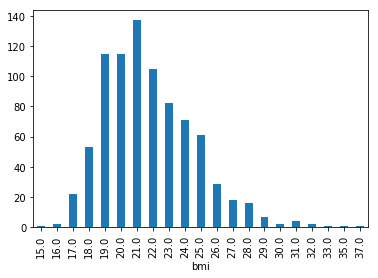

In [421]:
youngbmit['bmi'] = round(youngbmit['bmi'])
youngbmit.groupby('bmi').count()['Weight'].plot('bar')

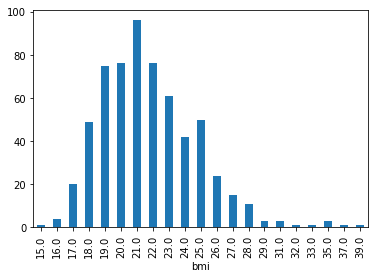

In [422]:
youngbmit_cp_old['bmi'] = round(youngbmit_cp_old['bmi'])
youngbmit_cp_old.groupby('bmi').count()['Weight'].plot('bar')